In [1]:
import yfinance as yf
import pandas as pd

# Descargar datos históricos de Yahoo Finance

In [47]:
# Definir los símbolos de los índices
sp500_ticker = "^GSPC" # S&P 500
ibex35_ticker = "^IBEX" # IBEX 35
# Definir el rango de fechas
start_date = "2000-01-01"
end_date = "2024-01-01"
# Descargar los datos históricos desde Yahoo Finance
sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)
ibex35_data = yf.download(ibex35_ticker, start=start_date, end=end_date)
# Mostrar las primeras filas de cada dataset
print("S&P 500 Data:")
print(sp500_data.head())
print("\nIBEX 35 Data:")
print(ibex35_data.head())
# Guardar los datos en CSV (opcional)
sp500_data.to_csv("sp500_data.csv")
ibex35_data.to_csv("ibex35_data.csv")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

S&P 500 Data:
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2000-01-03  1455.219971  1478.000000  1438.359985  1469.250000   931800000
2000-01-04  1399.420044  1455.219971  1397.430054  1455.219971  1009000000
2000-01-05  1402.109985  1413.270020  1377.680054  1399.420044  1085500000
2000-01-06  1403.449951  1411.900024  1392.099976  1402.109985  1092300000
2000-01-07  1441.469971  1441.469971  1400.729980  1403.449951  1225200000

IBEX 35 Data:
Price              Close          High           Low          Open Volume
Ticker             ^IBEX         ^IBEX         ^IBEX         ^IBEX  ^IBEX
Date                                                                     
2000-01-03  11609.988281  11881.787812  11574.388708  11641.388640      0
2000-01-04  11206.587891  11529.987943  11159.788135  11529.987943      0
2

In [2]:
# Rutas de los CSV
sp500_path = "data/sp500_data.csv"
ibex35_path = "data//ibex35_data.csv"

# Visualizar los datos

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datasets
df_sp500 = pd.read_csv(sp500_path, index_col=0, parse_dates=True)
df_ibex35 = pd.read_csv(ibex35_path, index_col=0, parse_dates=True)

# Eliminar la primera fila que contenía "Ticker"
df_sp500 = df_sp500.iloc[1:].copy()
df_ibex35 = df_ibex35.iloc[1:].copy()

# Convertir las columnas a tipo float
columns_to_convert = ["Close", "High", "Low", "Open", "Volume"]
for col in columns_to_convert:
    df_sp500[col] = pd.to_numeric(df_sp500[col], errors="coerce")
    df_ibex35[col] = pd.to_numeric(df_ibex35[col], errors="coerce")

# Interpolación lineal para manejar valores faltantes
df_sp500.interpolate(method='linear', inplace=True)
df_ibex35.interpolate(method='linear', inplace=True)

# Eliminar filas con valores nulos restantes
df_sp500.dropna(inplace=True)
df_ibex35.dropna(inplace=True)


C:\Users\bruno\AppData\Local\Temp\ipykernel_31808\3912878240.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sp500 = pd.read_csv(sp500_path, index_col=0, parse_dates=True)
C:\Users\bruno\AppData\Local\Temp\ipykernel_31808\3912878240.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ibex35 = pd.read_csv(ibex35_path, index_col=0, parse_dates=True)


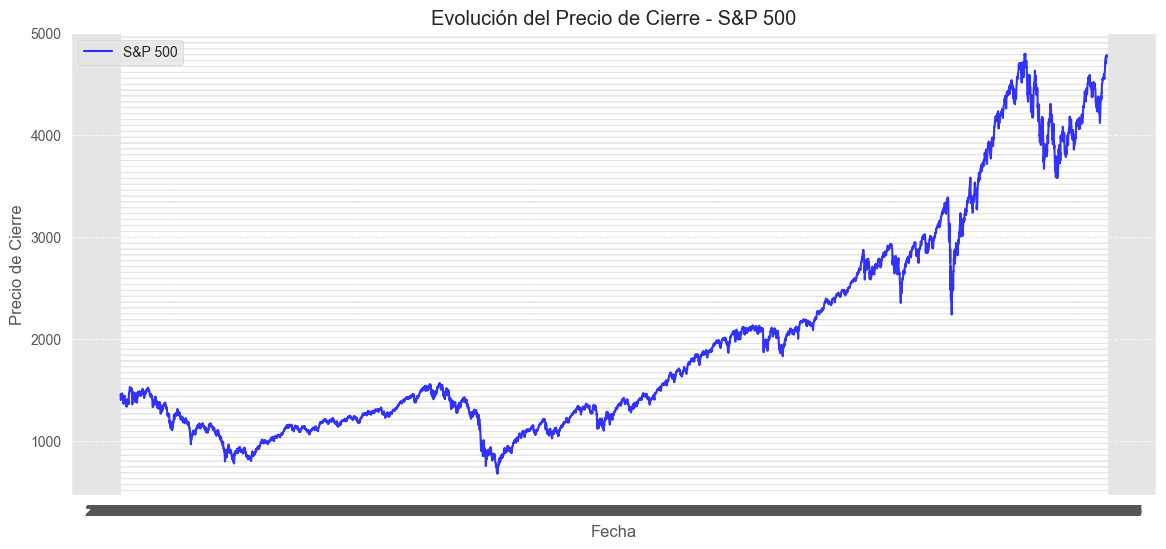

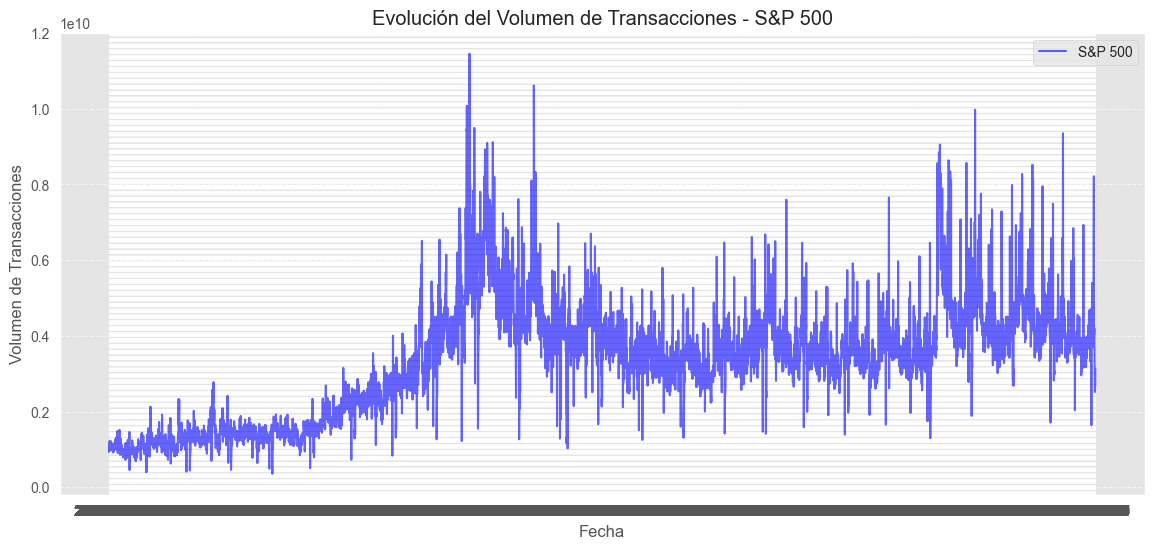

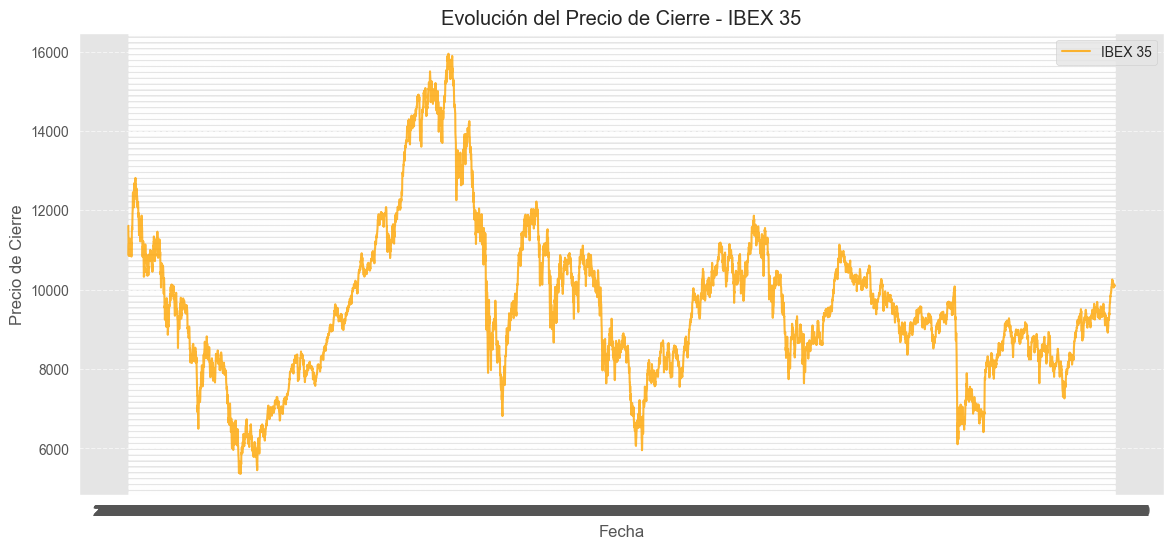

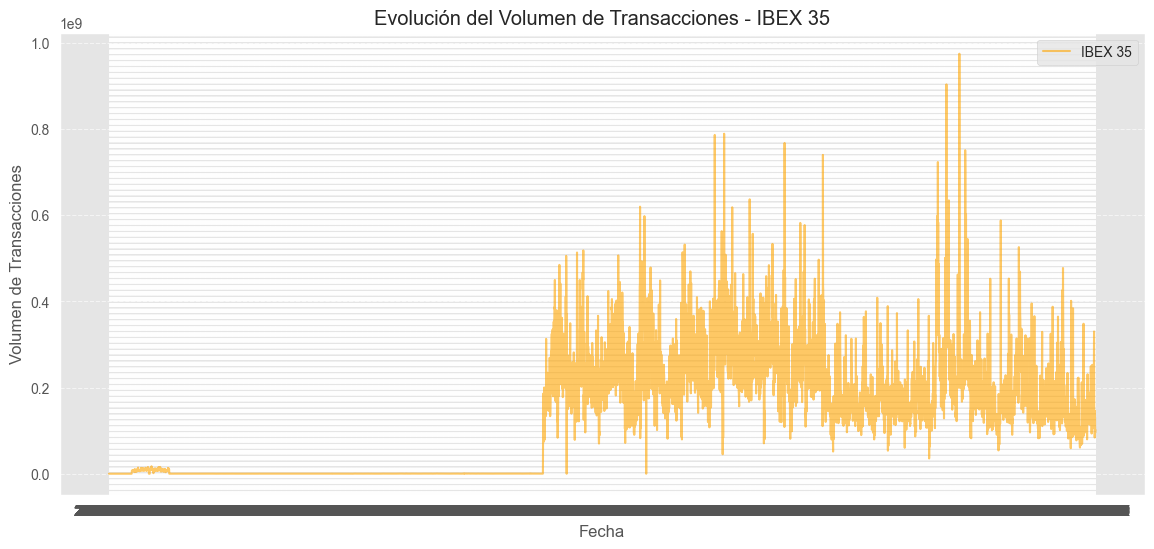

In [4]:
    # Configurar el estilo claro para mejorar la visualización
    plt.style.use("ggplot")

    # Gráfico del precio de cierre del S&P 500
    plt.figure(figsize=(14, 6))
    plt.plot(df_sp500.index, df_sp500["Close"], label="S&P 500", linewidth=1.5, color="blue", alpha=0.8)
    plt.xlabel("Fecha")
    plt.ylabel("Precio de Cierre")
    plt.title("Evolución del Precio de Cierre - S&P 500")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    # Gráfico del volumen de transacciones del S&P 500
    plt.figure(figsize=(14, 6))
    plt.plot(df_sp500.index, df_sp500["Volume"], label="S&P 500", linewidth=1.5, color="blue", alpha=0.6)
    plt.xlabel("Fecha")
    plt.ylabel("Volumen de Transacciones")
    plt.title("Evolución del Volumen de Transacciones - S&P 500")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    # Gráfico del precio de cierre del IBEX 35
    plt.figure(figsize=(14, 6))
    plt.plot(df_ibex35.index, df_ibex35["Close"], label="IBEX 35", linewidth=1.5, color="orange", alpha=0.8)
    plt.xlabel("Fecha")
    plt.ylabel("Precio de Cierre")
    plt.title("Evolución del Precio de Cierre - IBEX 35")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    # Gráfico del volumen de transacciones del IBEX 35
    plt.figure(figsize=(14, 6))
    plt.plot(df_ibex35.index, df_ibex35["Volume"], label="IBEX 35", linewidth=1.5, color="orange", alpha=0.6)
    plt.xlabel("Fecha")
    plt.ylabel("Volumen de Transacciones")
    plt.title("Evolución del Volumen de Transacciones - IBEX 35")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()


In [5]:
df_sp500

,Close,High,Low,Open,Volume
Price,,,,,
2000-01-03,1455.219971,1478.000000,1438.359985,1469.250000,9.318000e+08
2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1.009000e+09
2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1.085500e+09
2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1.092300e+09
2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1.225200e+09
...,...,...,...,...,...
2023-12-22,4754.629883,4772.939941,4736.770020,4753.919922,3.046770e+09
2023-12-26,4774.750000,4784.720215,4758.450195,4758.859863,2.513910e+09
2023-12-27,4781.580078,4785.390137,4768.899902,4773.450195,2.748450e+09


In [6]:
df_ibex35

,Close,High,Low,Open,Volume
Price,,,,,
2000-01-03,11609.988281,11881.787812,11574.388708,11641.388640,0.0
2000-01-04,11206.587891,11529.987943,11159.788135,11529.987943,0.0
2000-01-05,10863.088867,11068.088664,10824.889686,11068.088664,0.0
2000-01-07,11102.388672,11137.888634,10882.688708,10882.688708,0.0
2000-01-10,11173.288086,11364.287886,11120.587946,11120.587946,0.0
...,...,...,...,...,...
2023-12-21,10104.299805,10108.500000,10063.299805,10065.400391,84138300.0
2023-12-22,10111.900391,10143.099609,10081.000000,10094.099609,91972000.0
2023-12-27,10121.799805,10146.799805,10077.900391,10091.799805,130947500.0


# Transformación de los datos (IBEX35)

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Cargar el archivo CSV del IBEX 35 (ya limpio)
df_ibex35 = pd.read_csv("data/ibex35_data.csv", index_col=0, parse_dates=True)
df_ibex35 = df_ibex35.iloc[1:].copy()

# Convertir columnas a tipo float
columns_to_convert = ["Close", "High", "Low", "Open", "Volume"]
for col in columns_to_convert:
    df_ibex35[col] = pd.to_numeric(df_ibex35[col], errors="coerce")

# Interpolación y eliminación de nulos
df_ibex35.interpolate(method='linear', inplace=True)
df_ibex35.dropna(inplace=True)

# Normalización (Min-Max Scaling)
scaler_ibex35 = MinMaxScaler(feature_range=(0, 1))
df_ibex35_scaled = df_ibex35.copy()
df_ibex35_scaled[columns_to_convert] = scaler_ibex35.fit_transform(df_ibex35[columns_to_convert])

# Crear secuencias para modelos de series temporales
look_back = 30
ibex_close = df_ibex35_scaled[['Close']].values

def crear_secuencias(data, look_back):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i - look_back:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X_ibex, y_ibex = crear_secuencias(ibex_close, look_back)

# Separar en entrenamiento (80%) y test (20%)
split_index = int(len(X_ibex) * 0.8)
X_train_ibex, X_test_ibex = X_ibex[:split_index], X_ibex[split_index:]
y_train_ibex, y_test_ibex = y_ibex[:split_index], y_ibex[split_index:]

# Mostrar formas
print("X_train:", X_train_ibex.shape)
print("y_train:", y_train_ibex.shape)
print("X_test:", X_test_ibex.shape)
print("y_test:", y_test_ibex.shape)


X_train: (4857, 30, 1)
y_train: (4857, 1)
X_test: (1215, 30, 1)
y_test: (1215, 1)


C:\Users\bruno\AppData\Local\Temp\ipykernel_31808\4186821800.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ibex35 = pd.read_csv("data/ibex35_data.csv", index_col=0, parse_dates=True)


In [8]:
resultados = []
resultados

[]

In [9]:
df_ibex35

,Close,High,Low,Open,Volume
Price,,,,,
2000-01-03,11609.988281,11881.787812,11574.388708,11641.388640,0.0
2000-01-04,11206.587891,11529.987943,11159.788135,11529.987943,0.0
2000-01-05,10863.088867,11068.088664,10824.889686,11068.088664,0.0
2000-01-07,11102.388672,11137.888634,10882.688708,10882.688708,0.0
2000-01-10,11173.288086,11364.287886,11120.587946,11120.587946,0.0
...,...,...,...,...,...
2023-12-21,10104.299805,10108.500000,10063.299805,10065.400391,84138300.0
2023-12-22,10111.900391,10143.099609,10081.000000,10094.099609,91972000.0
2023-12-27,10121.799805,10146.799805,10077.900391,10091.799805,130947500.0


# Prueba de modelos para Ibex35

## RNN

Epoch 1/20


C:\Users\bruno\PycharmProjects\ IBEX_35_S&P_500\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0093 - val_loss: 1.6037e-04
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.7519e-04 - val_loss: 1.1312e-04
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.5662e-04 - val_loss: 1.0166e-04
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3659e-04 - val_loss: 1.3738e-04
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3930e-04 - val_loss: 9.3509e-05
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0009e-04 - val_loss: 1.1361e-04
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8948e-04 - val_loss: 8.8201e-05
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6655e-04 - val_loss: 1.0066e-04
Epoch 9/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4764e-04 - val_loss: 7.6930e-05
Epoch 10/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3524e-04 - val_loss: 9.3235e-05
Epoch 11/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6181e-04 - 

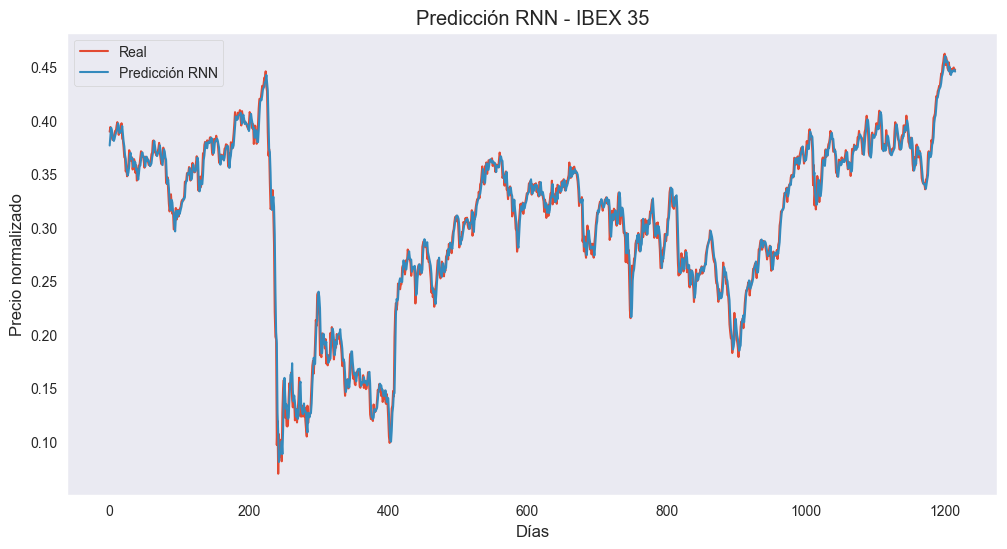

In [12]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modelo RNN
model_rnn = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(X_train_ibex.shape[1], X_train_ibex.shape[2])),
    Dense(1)
])

model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_rnn = model_rnn.fit(
    X_train_ibex, y_train_ibex,
    validation_split=0.1,
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predicciones
pred_rnn = model_rnn.predict(X_test_ibex)

# Calcular métricas
mse = mean_squared_error(y_test_ibex, pred_rnn)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_ibex, pred_rnn)
r2 = r2_score(y_test_ibex, pred_rnn)

print("RNN - MAE:", mae)
print("RNN - RMSE:", rmse)
print("RNN - R2 Score:", r2)

# Asegurarse de que 'Price' sea una columna (no el índice)
if 'Price' not in df_ibex35.columns and df_ibex35.index.name == 'Price':
    df_ibex35 = df_ibex35.reset_index()

# Eliminar 'level_0' si aparece al leer desde CSV con índice
if 'level_0' in df_ibex35.columns:
    df_ibex35 = df_ibex35.drop(columns=['level_0'])

# Invertir normalización solo del precio de cierre
scaler_close_ibex = MinMaxScaler()
scaler_close_ibex.fit(df_ibex35[['Close']])  # Asegúrate que 'Close' existe
y_test_inv = scaler_close_ibex.inverse_transform(y_test_ibex.reshape(-1, 1))
y_pred_inv = scaler_close_ibex.inverse_transform(pred_rnn.reshape(-1, 1))

# Usar fechas reales si existen
if 'Date' in df_ibex35.columns:
    fechas = df_ibex35['Date'].values[-len(y_test_ibex):]
else:
    fechas = pd.date_range(start='2020-01-01', periods=len(y_test_ibex), freq='D')


# Crear DataFrame con valores reales
df_rnn_ibex = pd.DataFrame({
    'Fecha': fechas,
    'Precio_Real': y_test_inv.flatten(),
    'Prediccion_RNN': y_pred_inv.flatten()
})

# Guardar a CSV
df_rnn_ibex.to_csv('predicciones_rnn_ibex.csv', index=False)


# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test_ibex, label="Real")
plt.plot(pred_rnn, label="Predicción RNN")
plt.title("Predicción RNN - IBEX 35")
plt.xlabel("Días")
plt.ylabel("Precio normalizado")
plt.legend()
plt.grid()
plt.show()

# Guardar métricas
resultados.append({
    'Modelo': 'RNN',
    'Dataset': 'IBEX 35',
    'MAE': mae,
    'RMSE': rmse,
    'R2': r2
})


In [13]:
# Asegurarte de que las predicciones coinciden en longitud con el final del DataFrame original
df_result_ibex = df_ibex35.iloc[-len(y_pred_inv):].copy()

# Añadir la predicción (ya invertida) como nueva columna
df_result_ibex['Prediccion_RNN'] = y_pred_inv.flatten()
df_result_ibex['Precio_Real'] = y_test_inv.flatten()

# Guardar como CSV
df_result_ibex.to_csv('predicciones_ibex.csv', index=False)


## LSTM

Epoch 1/20


C:\Users\bruno\PycharmProjects\ IBEX_35_S&P_500\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0389 - val_loss: 2.2534e-04
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.5935e-04 - val_loss: 2.1764e-04
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.4914e-04 - val_loss: 2.0985e-04
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.3876e-04 - val_loss: 2.0142e-04
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.8487e-04 - val_loss: 1.9215e-04
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.3540e-04 - val_loss: 1.9176e-04
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.1810e-04 - val_loss: 1.6976e-04
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.0713e-04 - val_loss: 1.7296e-04
Epoch 9/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.5882e-04 - val_loss: 1.5940e-04
Epoch 10/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.3640e-04 - val_loss: 1.5616e-04
Epoch 11/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.3582e-04 - 

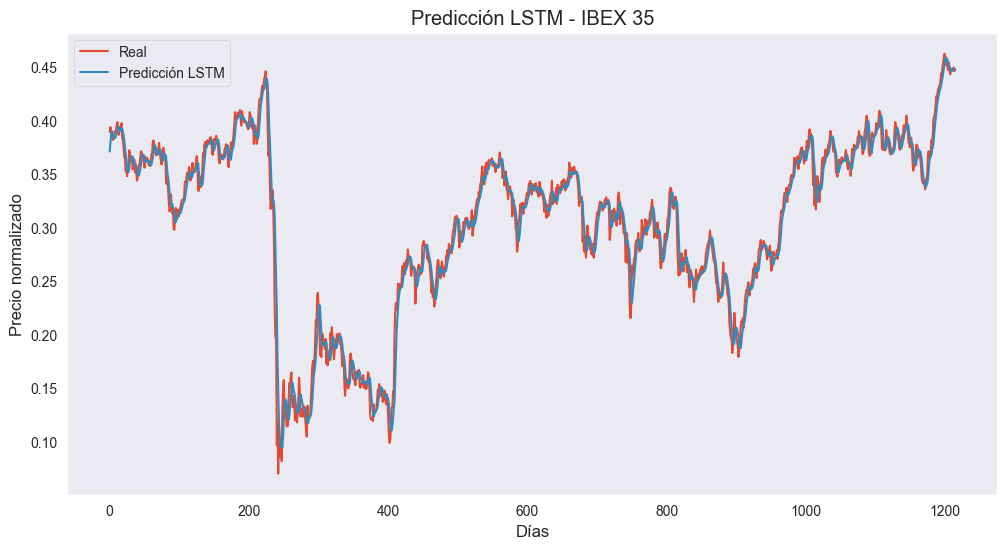

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Modelo LSTM
model_lstm = Sequential([
    LSTM(50, activation='tanh', input_shape=(X_train_ibex.shape[1], X_train_ibex.shape[2])),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_lstm = model_lstm.fit(
    X_train_ibex, y_train_ibex,
    validation_split=0.1,
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predicciones
pred_lstm = model_lstm.predict(X_test_ibex)

# Métricas
mse = mean_squared_error(y_test_ibex, pred_lstm)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_ibex, pred_lstm)
r2 = r2_score(y_test_ibex, pred_lstm)

print("LSTM - MAE:", mae)
print("LSTM - RMSE:", rmse)
print("LSTM - R2 Score:", r2)

# Gráfico de resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test_ibex, label="Real")
plt.plot(pred_lstm, label="Predicción LSTM")
plt.title("Predicción LSTM - IBEX 35")
plt.xlabel("Días")
plt.ylabel("Precio normalizado")
plt.legend()
plt.grid()
plt.show()

resultados.append({
    'Modelo': 'LSTM',
    'Dataset': 'IBEX 35',
    'MAE': mae,
    'RMSE': rmse,
    'R2': r2
})



## GRU

Epoch 1/20


C:\Users\bruno\PycharmProjects\ IBEX_35_S&P_500\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0233 - val_loss: 1.0072e-04
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.9580e-04 - val_loss: 9.0834e-05
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.5386e-04 - val_loss: 8.3055e-05
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.5211e-04 - val_loss: 8.2483e-05
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.3974e-04 - val_loss: 7.6068e-05
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2945e-04 - val_loss: 8.5746e-05
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.3803e-04 - val_loss: 8.3822e-05
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2173e-04 - val_loss: 6.6754e-05
Epoch 9/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1872e-04 - val_loss: 6.6626e-05
Epoch 10/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0144e-04 - val_loss: 6.5515e-05
Epoch 11/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2071e-04 -

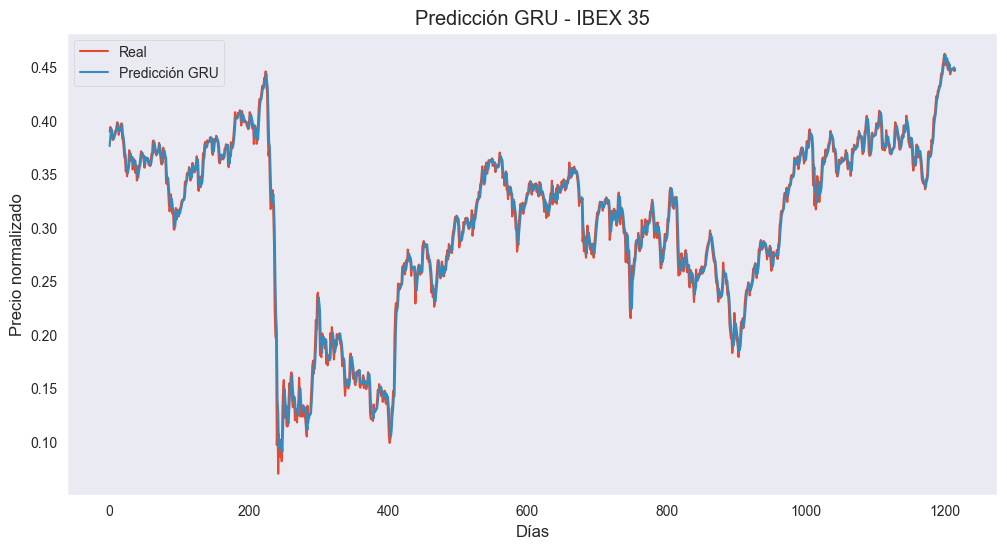

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Modelo GRU
model_gru = Sequential([
    GRU(50, activation='tanh', input_shape=(X_train_ibex.shape[1], X_train_ibex.shape[2])),
    Dense(1)
])

model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_gru = model_gru.fit(
    X_train_ibex, y_train_ibex,
    validation_split=0.1,
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predicciones
pred_gru = model_gru.predict(X_test_ibex)

# Calcular métricas
mse = mean_squared_error(y_test_ibex, pred_gru)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_ibex, pred_gru)
r2 = r2_score(y_test_ibex, pred_gru)

print("GRU - MAE:", mae)
print("GRU - RMSE:", rmse)
print("GRU - R2 Score:", r2)

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test_ibex, label="Real")
plt.plot(pred_gru, label="Predicción GRU")
plt.title("Predicción GRU - IBEX 35")
plt.xlabel("Días")
plt.ylabel("Precio normalizado")
plt.legend()
plt.grid()
plt.show()

resultados.append({
    'Modelo': 'GRU',
    'Dataset': 'IBEX 35',
    'MAE': mae,
    'RMSE': rmse,
    'R2': r2
})


## Neural Prophet

In [57]:
import pandas as pd
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

df_np = df_ibex35[['Close']].copy()

# Asegurarnos de que el índice es datetime y lo convertimos en columna
df_np = df_np.reset_index()
df_np.columns = ['ds', 'y']  # Renombramos columnas directamente

# Convertimos 'ds' a datetime, por si acaso
df_np['ds'] = pd.to_datetime(df_np['ds'])


# División en conjunto de entrenamiento y validación
split_index = int(len(df_np) * 0.8)
df_train_np = df_np.iloc[:split_index]
df_val_np = df_np.iloc[split_index:]

import numpy as np
np.NaN = np.nan  #  hack para arreglar incompatibilidad con NeuralProphet



In [ ]:
model_np = NeuralProphet(
    n_forecasts=7,              # 7 días a futuro
    n_lags=30,                  # Usa los últimos 30 días
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    learning_rate=0.01,
    normalize=False             # No normalizamos para mantener escala real
)

# Entrenamiento
metrics = model_np.fit(df_train_np, freq="D", epochs=300, checkpointing=False)

# %% [Predicción sobre validación]
future = model_np.make_future_dataframe(df_val_np, n_historic_predictions=True)
forecast = model_np.predict(future)

# Eliminar cualquier fila con NaN en forecast
forecast_clean = forecast.dropna(subset=['yhat1'])

# Alinear con df_val_np
# Nos quedamos solo con las fechas que aparecen tanto en forecast limpio como en df_val_np
common_dates = df_val_np['ds'].isin(forecast_clean['ds'])
df_val_np_clean = df_val_np[common_dates]
forecast_clean = forecast_clean[forecast_clean['ds'].isin(df_val_np_clean['ds'])]

# Extraer valores
y_true = df_val_np_clean['y'].values
y_pred = forecast_clean['yhat1'].values

In [59]:

# Métricas
mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 71.17
RMSE: 10300.86
R²: 0.99


In [60]:
import matplotlib.pyplot as plt

# Aseguramos que las longitudes coincidan
df_plot = df_val_np.copy()
df_plot["Predicted"] = forecast["yhat1"].values

plt.figure(figsize=(12, 6))
plt.plot(df_plot["ds"], df_plot["y"], label="Real", color="black")
plt.plot(df_plot["ds"], df_plot["Predicted"], label="Predicted", color="blue", linestyle="--")
plt.title("Predicción con NeuralProphet")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: Length of values (1747) does not match length of index (1221)

# SP500

## RNN

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- Escalar datos ---
scaler_sp500 = MinMaxScaler()
scaled_data = scaler_sp500.fit_transform(df_sp500[['Close']])

# --- Crear secuencias ---
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(scaled_data, window_size)

# --- Train/test split ---
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# --- Adaptar shape para RNN ---
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [21]:
# --- Modelo RNN ---
model_rnn = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])
model_rnn.compile(optimizer='adam', loss='mse')

# --- Entrenamiento ---
model_rnn.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20


C:\Users\bruno\PycharmProjects\ IBEX_35_S&P_500\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0148
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.5583e-04
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.6636e-04
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2554e-04
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.2585e-05
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.6776e-05
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.2746e-05
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.4025e-05
Epoch 9/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.8237e-05
Epoch 10/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.2821e-05
Epoch 11/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.4106e-05
Epoch 12/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.4132e-05
Epoch 13/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.5293e-05
Epoch 14/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.4339e-05
Epoch 15/20
150/

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MAE: 131.34
RMSE: 161.03
R²: 0.93


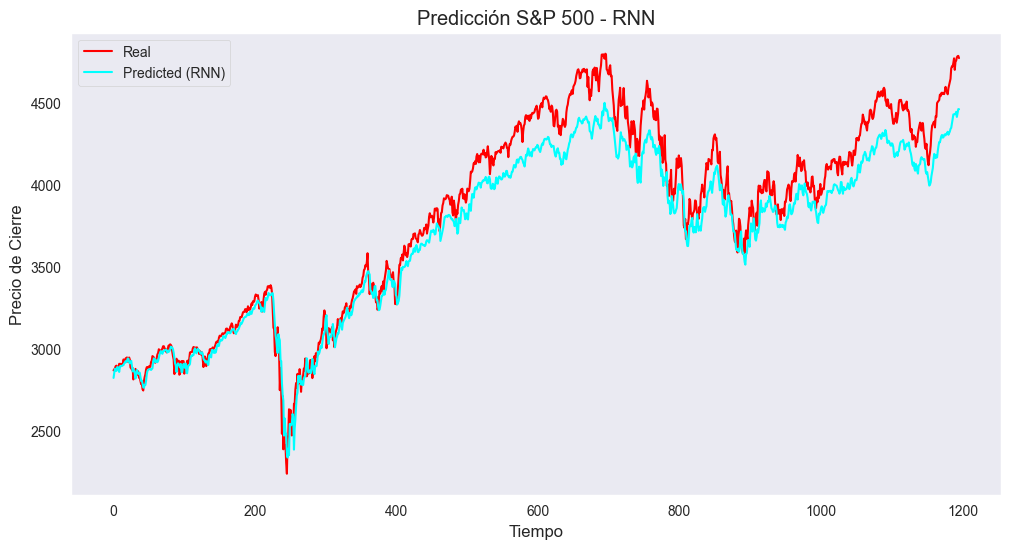

In [22]:
# --- Predicción ---
y_pred_rnn = model_rnn.predict(X_test)
y_test_inv = scaler_sp500.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler_sp500.inverse_transform(y_pred_rnn)

# --- Métricas ---
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# --- Fechas desde df_sp500 ---
if 'Date' in df_sp500.columns:
    fechas = df_sp500['Date'].values[-len(y_test):]
else:
    fechas = df_sp500.index[-len(y_test):]

# --- Guardar DataFrame final ---
df_result_sp = df_sp500.iloc[-len(y_test):].copy()
df_result_sp['Precio_Real'] = y_test_inv.flatten()
df_result_sp['Prediccion_RNN'] = y_pred_inv.flatten()
df_result_sp['Fecha'] = fechas
df_result_sp.to_csv('predicciones_rnn_sp.csv', index=False)

# --- Plot ---
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Real', color='red')
plt.plot(y_pred_inv, label='Predicted (RNN)', color='cyan')
plt.title('Predicción S&P 500 - RNN')
plt.xlabel('Tiempo')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.grid()
plt.show()

# --- Guardar métricas ---
resultados.append({
    'Modelo': 'RNN',
    'Dataset': 'S&P 500',
    'MAE': mae,
    'RMSE': rmse,
    'R2': r2
})

## LSTM

Epoch 1/20


C:\Users\bruno\PycharmProjects\ IBEX_35_S&P_500\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0128 - val_loss: 4.8606e-04
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 4.2627e-05 - val_loss: 5.1745e-04
Epoch 3/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 4.1623e-05 - val_loss: 2.7163e-04
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 4.0346e-05 - val_loss: 2.3931e-04
Epoch 5/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.9282e-05 - val_loss: 3.5683e-04
Epoch 6/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.9609e-05 - val_loss: 1.4467e-04
Epoch 7/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.8393e-05 - val_loss: 2.9378e-04
Epoch 8/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.6932e-05 - val_loss: 1.1862e-04
Epoch 9/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 3.8797e-05 - val_loss: 2.2864e-04
Epoch 10/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.5578e-05 - val_loss: 1.4614e-04
Epoch 11/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.

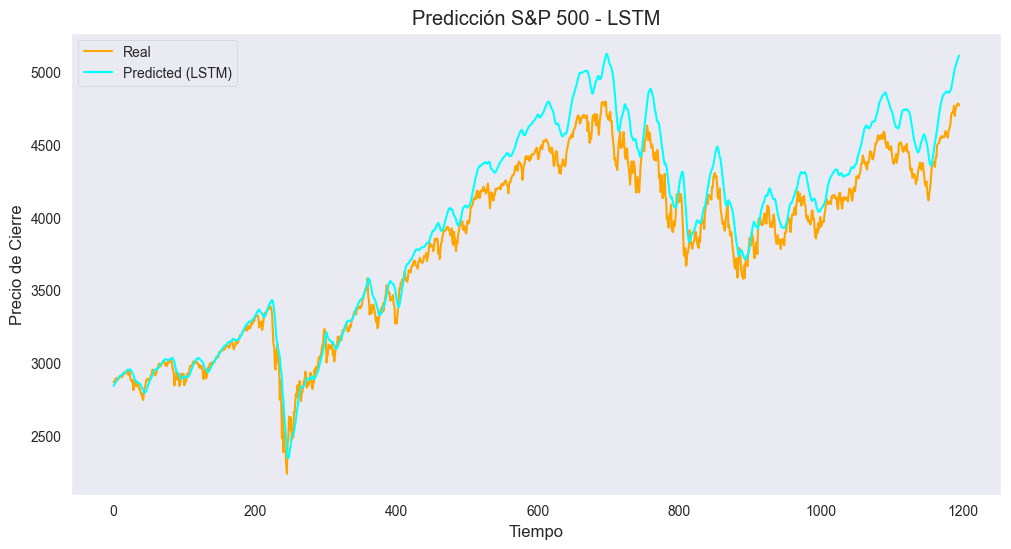

In [23]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Modelo LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Entrenamiento
history_lstm = model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Predicción
y_pred_lstm = model_lstm.predict(X_test)

# Inversión de la escala
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_inv = scaler.inverse_transform(y_pred_lstm).flatten()

# Métricas
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Gráfico
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Real', color='orange')
plt.plot(y_pred_inv, label='Predicted (LSTM)', color='cyan')
plt.title('Predicción S&P 500 - LSTM')
plt.xlabel('Tiempo')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.grid()
plt.show()

resultados.append({
    'Modelo': 'LSTM',
    'Dataset': 'S&P 500',
    'MAE': mae,
    'RMSE': rmse,
    'R2': r2
})


## GRU

Epoch 1/20


C:\Users\bruno\PycharmProjects\ IBEX_35_S&P_500\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0107 - val_loss: 0.0012
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2577e-05 - val_loss: 9.4146e-04
Epoch 3/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.1241e-05 - val_loss: 9.0863e-04
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.4223e-05 - val_loss: 9.6918e-04
Epoch 5/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9801e-05 - val_loss: 0.0010
Epoch 6/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8722e-05 - val_loss: 9.8114e-04
Epoch 7/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.0049e-05 - val_loss: 0.0011
Epoch 8/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.0013e-05 - val_loss: 0.0010
Epoch 9/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 1.9491e-05 - val_loss: 9.8878e-04
Epoch 10/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 1.8058e-05 - val_loss: 0.0011
Epoch 11/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 1.8547e-05 - val_loss:

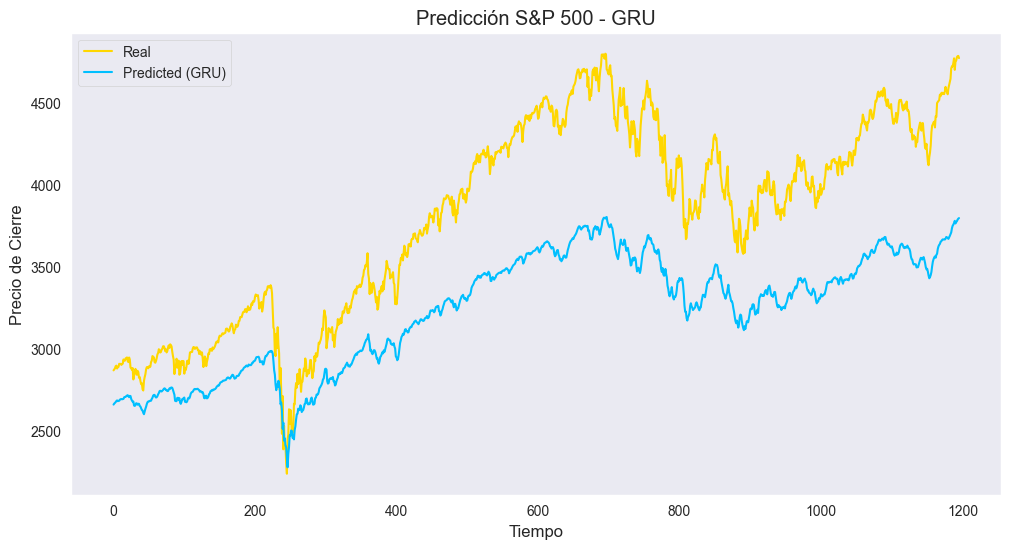

In [24]:
from keras.models import Sequential
from keras.layers import GRU, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Modelo GRU
model_gru = Sequential()
model_gru.add(GRU(50, activation='relu', return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')

# Entrenamiento
history_gru = model_gru.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Predicción
y_pred_gru = model_gru.predict(X_test)

# Inversión de escala
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_inv = scaler.inverse_transform(y_pred_gru).flatten()

# Métricas
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Gráfico
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Real', color='gold')
plt.plot(y_pred_inv, label='Predicted (GRU)', color='deepskyblue')
plt.title('Predicción S&P 500 - GRU')
plt.xlabel('Tiempo')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.grid()
plt.show()

resultados.append({
    'Modelo': 'GRU',
    'Dataset': 'S&P 500',
    'MAE': mae,
    'RMSE': rmse,
    'R2': r2
})


# Visualización de resultados

In [25]:
import pandas as pd
df_resultados = pd.DataFrame(resultados)
print(df_resultados)


  Modelo  Dataset         MAE        RMSE        R2
0    RNN  IBEX 35    0.007432    0.010458  0.982992
1   LSTM  IBEX 35    0.009260    0.013328  0.972374
2    GRU  IBEX 35    0.007514    0.010827  0.981769
3    RNN  S&P 500  150.085834    0.010827  0.981769
4    RNN  S&P 500  150.085834    0.010827  0.981769
5    RNN  S&P 500  131.341099  161.026811  0.928750
6   LSTM  S&P 500  140.529401  177.230887  0.913689
7    GRU  S&P 500  581.270912  632.197429 -0.098235


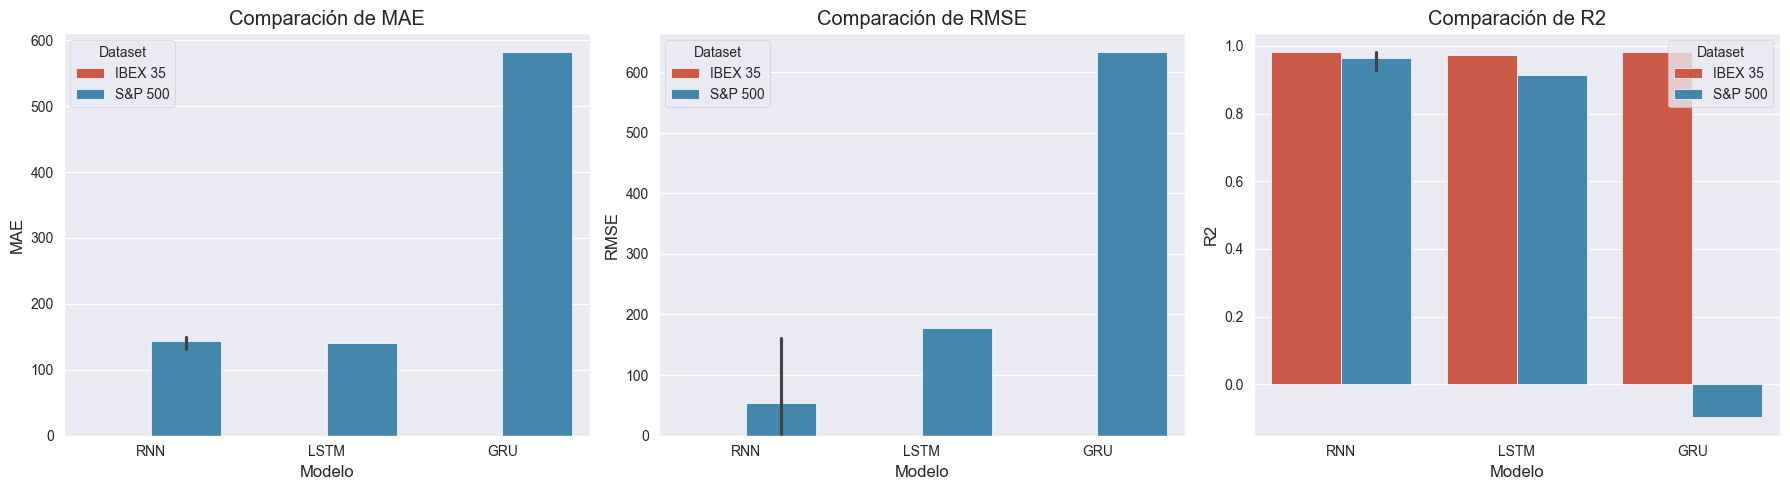

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear gráficos por separado
metrics = ['MAE', 'RMSE', 'R2']
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    sns.barplot(data=df_resultados, x='Modelo', y=metric, hue='Dataset', ax=axs[i])
    axs[i].set_title(f'Comparación de {metric}')
    axs[i].set_ylabel(metric)
    axs[i].set_xlabel('Modelo')

plt.tight_layout()
plt.show()

En ambos casos los mejores resultados los dan las RNN

 # ¿Por qué las RNN funcionan bien en este caso?
 1. Porque recuerdan el pasado
Las RNN están diseñadas para mantener una "memoria" de eventos anteriores, lo que es ideal en series temporales donde el valor actual depende de los anteriores.

En nuestro caso, el precio del día de hoy está altamente correlacionado con los días previos.

 2. Porque procesan datos secuenciales
Las RNN procesan una secuencia paso a paso, lo que refleja cómo evoluciona el mercado en el tiempo.

Esto permite captar patrones como tendencias, ciclos o reversiones.

3. Porque son más simples y eficientes
Aunque las LSTM y GRU son mejoras sofisticadas de las RNN, en algunos casos (como el IBEX 35), una RNN más simple puede generalizar mejor si los datos no son muy complejos.

En tu caso, parece que el IBEX 35 tiene un comportamiento más predecible, y la RNN capta bien esa regularidad.

 4. Porque captan dependencias de corto plazo
Si la serie tiene dependencias a corto plazo más que a largo plazo, las RNN simples funcionan bien, sin necesidad de la complejidad de una LSTM o GRU.

En el IBEX, este podría ser el caso, y por eso la RNN se comporta tan bien.